In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/air_fare_raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         12781 non-null  object
 1   Departure_Time  12781 non-null  object
 2   Arrival_Time    12781 non-null  object
 3   Duration        12781 non-null  int64 
 4   Departure       12781 non-null  object
 5   Destination     12781 non-null  object
 6   Date            12781 non-null  object
 7   Total_Stops     12781 non-null  int64 
 8   SClass          12781 non-null  object
 9   Price           12781 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 998.6+ KB


In [4]:
df.isna().sum()

Airline           0
Departure_Time    0
Arrival_Time      0
Duration          0
Departure         0
Destination       0
Date              0
Total_Stops       0
SClass            0
Price             0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [24]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)
trainset.reset_index(inplace=True, drop=True)
testset.reset_index(inplace=True, drop=True)

### Strings Handling

In [25]:
trainset[['Departure_Time', 'Arrival_Time']] = trainset[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)
trainset['Date'] = (pd.to_datetime(trainset['Date'], dayfirst=True, format='%d-%m-%Y')).dt.day    

testset[['Departure_Time', 'Arrival_Time']] = testset[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)
testset['Date'] = (pd.to_datetime(testset['Date'], dayfirst=True, format='%d-%m-%Y')).dt.day  

C:\Users\acer\AppData\Local\Temp\ipykernel_8416\1447415820.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trainset[['Departure_Time', 'Arrival_Time']] = trainset[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\acer\AppData\Local\Temp\ipykernel_8416\1447415820.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trainset[['Departure_Time', 'Arrival_Time']] = trainset[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\acer\AppData\Local\Temp\ipykernel_8416\1447415820.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testset[['Departure

In [26]:
def extract_hour(data, col):
    data[col.replace('_Time', '') + '_Hour'] = data[col].dt.hour
    
def extract_min(data, col):
    data[col.replace('_Time', '') + '_Min'] = data[col].dt.minute
    
def drop_col(data, col):
    data.drop(col, axis = 1, inplace=True)

In [27]:
# For Trainset
extract_hour(trainset, 'Departure_Time')
extract_min(trainset, 'Departure_Time')
drop_col(trainset, 'Departure_Time')

extract_hour(trainset, 'Arrival_Time')
extract_min(trainset, 'Arrival_Time')
drop_col(trainset, 'Arrival_Time')

# For Testset
extract_hour(testset, 'Departure_Time')
extract_min(testset, 'Departure_Time')
drop_col(testset, 'Departure_Time')

extract_hour(testset, 'Arrival_Time')
extract_min(testset, 'Arrival_Time')
drop_col(testset, 'Arrival_Time')

In [28]:
trainset

,Airline,Duration,Departure,Destination,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Vietnam Airlines,120,VII,SGN,17,0,ECONOMY,1505000,9,15,11,15
1,Vietnam Airlines,95,DAD,HAN,19,0,ECONOMY,1516000,20,50,22,25
2,Vietnam Airlines,560,VCS,DLI,18,1,ECONOMY,2992000,6,40,16,0
3,Vietnam Airlines,335,CXR,HPH,18,1,BUSINESS,7523000,13,25,19,0
4,Vietnam Airlines,105,VDH,SGN,20,0,ECONOMY,1728000,10,5,11,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10148,Vietnam Airlines,455,VII,DAD,21,1,ECONOMY,2395000,9,0,16,35
10149,Vietnam Airlines,690,VCS,VCL,17,1,ECONOMY,2316000,6,50,18,20
10150,Vietnam Airlines,130,SGN,HPH,18,0,BUSINESS,4684000,8,5,10,15
10151,Bamboo Airways,80,HUI,HAN,15,0,ECONOMY,1839000,20,30,21,50


In [29]:
testset

,Airline,Duration,Departure,Destination,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Vietnam Airlines,430,HPH,PQC,18,1,ECONOMY,3930000,14,15,21,25
1,VietJet Air,70,SGN,UIH,16,0,PREMIUM_ECONOMY,3199800,10,40,11,50
2,Vietnam Airlines,465,DLI,THD,17,1,BUSINESS,8983000,12,35,20,20
3,VietJet Air,80,HAN,DAD,20,0,ECONOMY,2144900,14,50,16,10
4,Bamboo Airways,115,CXR,HAN,21,0,PREMIUM_ECONOMY,4782000,12,40,14,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2534,VietJet Air,110,VII,SGN,16,0,ECONOMY,1099900,8,25,10,15
2535,Vietnam Airlines,495,VCS,CXR,18,1,ECONOMY,2893000,6,40,14,55
2536,Vietnam Airlines,380,DLI,DAD,16,1,BUSINESS,8768000,13,50,20,10
2537,Vietnam Airlines,400,DLI,PQC,16,1,ECONOMY,3180000,12,35,19,15


### Data Normalizing

In [30]:
def data_normalizer():
    robust_scaler = RobustScaler()
    trainset_before = trainset.copy() 
    trainset[['Duration']] = robust_scaler.fit_transform(trainset[['Duration']])
    testset[['Duration']] = robust_scaler.transform(testset[['Duration']])
    return trainset_before, trainset

In [31]:
bins = 50
alpha = 0.5

def visulize(trainset_before, trainset):
    fig1, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(trainset_before['Duration'], bins, alpha=alpha, color='rosybrown')
    ax.axvline(trainset_before['Duration'].mean(), color='k', linestyle='dashed', linewidth=1)
    ax.set_title('Before Robust Scaler')
    
    fig2, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(trainset['Duration'], bins, alpha=alpha, color='steelblue')
    ax.axvline(trainset['Duration'].mean(), color='k', linestyle='dashed', linewidth=1)
    ax.set_title('After Robust Scaler')

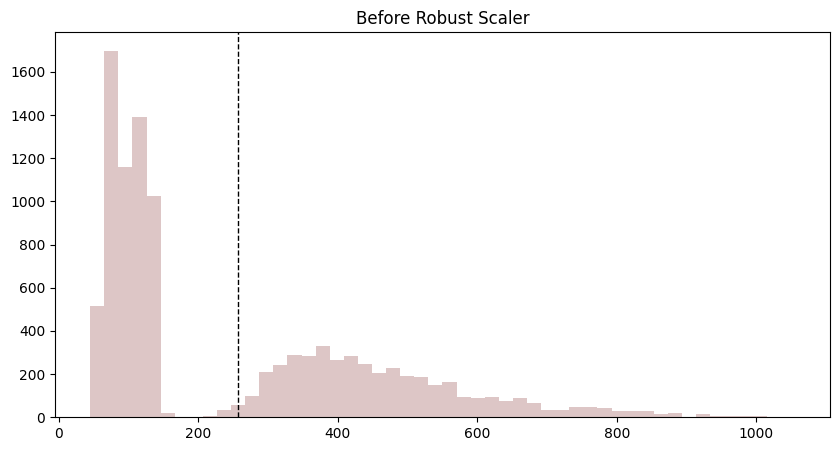

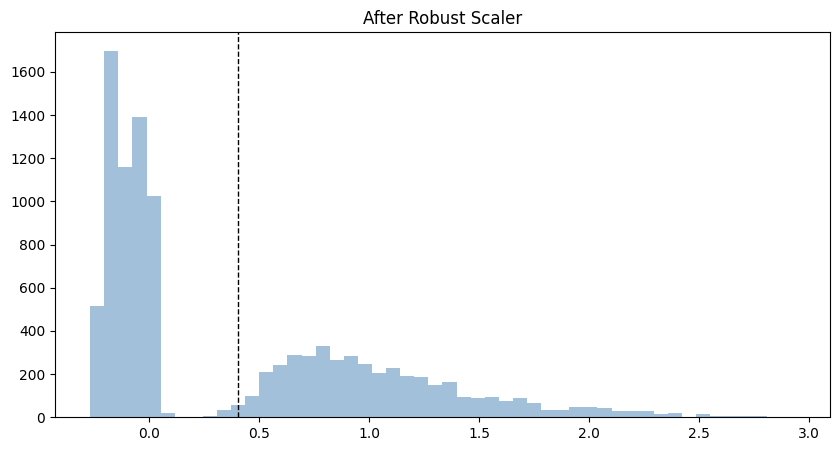

In [32]:
trainset_before, trainset = data_normalizer()
visulize(trainset_before, trainset)

### Categorical Data Handling
1. Nominal data --> Data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> Data are in order --> LabelEncoder is used in this case


In [33]:
categoricals = [f for f in trainset.columns if trainset.dtypes[f] == 'object']
trainset[categoricals] = trainset[categoricals].apply(lambda x: x.astype('category'))
testset[categoricals] = testset[categoricals].apply(lambda x: x.astype('category'))

In [34]:
label_encoder = LabelEncoder()

def getfullitemsforOHE(wholedf, featlist, sort=True):
    def sortornot(X):
        if sort==False:
            return X
        else:
            return sorted(X)
       
    fulllist=[]
    for feat in featlist:
        fulllist.append(sortornot(wholedf[feat].unique()))
    return fulllist


cat_columns = ['Airline', 'Departure', 'Destination']
whole = pd.concat([trainset, testset], axis=0)
cats = getfullitemsforOHE(whole, cat_columns)
one_hot_encoder = OneHotEncoder(categories=cats, sparse_output=False, handle_unknown='ignore')

##### For Trainset

In [35]:
trainset_after = one_hot_encoder.fit_transform(trainset[cat_columns])
trainset_ohe = pd.DataFrame(trainset_after, columns=one_hot_encoder.get_feature_names_out(cat_columns))
trainset = pd.concat([trainset, trainset_ohe], axis = 1)
trainset.drop(['Airline', 'Departure', 'Destination'], axis = 1, inplace = True)

trainset['SClass'] = label_encoder.fit_transform(trainset['SClass'])

trainset

,Duration,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Airline_Bamboo Airways,...,Destination_TBB,Destination_THD,Destination_UIH,Destination_VCA,Destination_VCL,Destination_VCS,Destination_VDH,Destination_VDO,Destination_VII,Destination_VKG
0,-0.031746,17,0,1,1505000,9,15,11,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.111111,19,0,1,1516000,20,50,22,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.365079,18,1,1,2992000,6,40,16,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.650794,18,1,0,7523000,13,25,19,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.079365,20,0,1,1728000,10,5,11,50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,1.031746,21,1,1,2395000,9,0,16,35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10149,1.777778,17,1,1,2316000,6,50,18,20,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10150,0.000000,18,0,0,4684000,8,5,10,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10151,-0.158730,15,0,1,1839000,20,30,21,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### For Testset

In [36]:
testset_after = one_hot_encoder.transform(testset[cat_columns])
testset_ohe = pd.DataFrame(testset_after, columns=one_hot_encoder.get_feature_names_out(cat_columns))
testset = pd.concat([testset, testset_ohe], axis = 1)
testset.drop(['Airline', 'Departure', 'Destination'], axis = 1, inplace = True)

testset['SClass'] = label_encoder.transform(testset['SClass'])

testset

,Duration,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Airline_Bamboo Airways,...,Destination_TBB,Destination_THD,Destination_UIH,Destination_VCA,Destination_VCL,Destination_VCS,Destination_VDH,Destination_VDO,Destination_VII,Destination_VKG
0,0.952381,18,1,1,3930000,14,15,21,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.190476,16,0,2,3199800,10,40,11,50,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.063492,17,1,0,8983000,12,35,20,20,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.158730,20,0,1,2144900,14,50,16,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.047619,21,0,2,4782000,12,40,14,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,-0.063492,16,0,1,1099900,8,25,10,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2535,1.158730,18,1,1,2893000,6,40,14,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,0.793651,16,1,0,8768000,13,50,20,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2537,0.857143,16,1,1,3180000,12,35,19,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
trainset.to_csv('../clean_data/BigDS_train.csv', header=True, index=False)
testset.to_csv('../clean_data/BigDS_test.csv', header=True, index=False)